<hr>
<b><font color='red'>Ejercicio 01</font></b>  
Escribe el código necesario para crear los gráficos que se muestran a continuación.

In [2]:
import seaborn as sns


In [3]:
sns.set_style('darkgrid') # darkgrid, whitegrid, dark, white, ticks
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


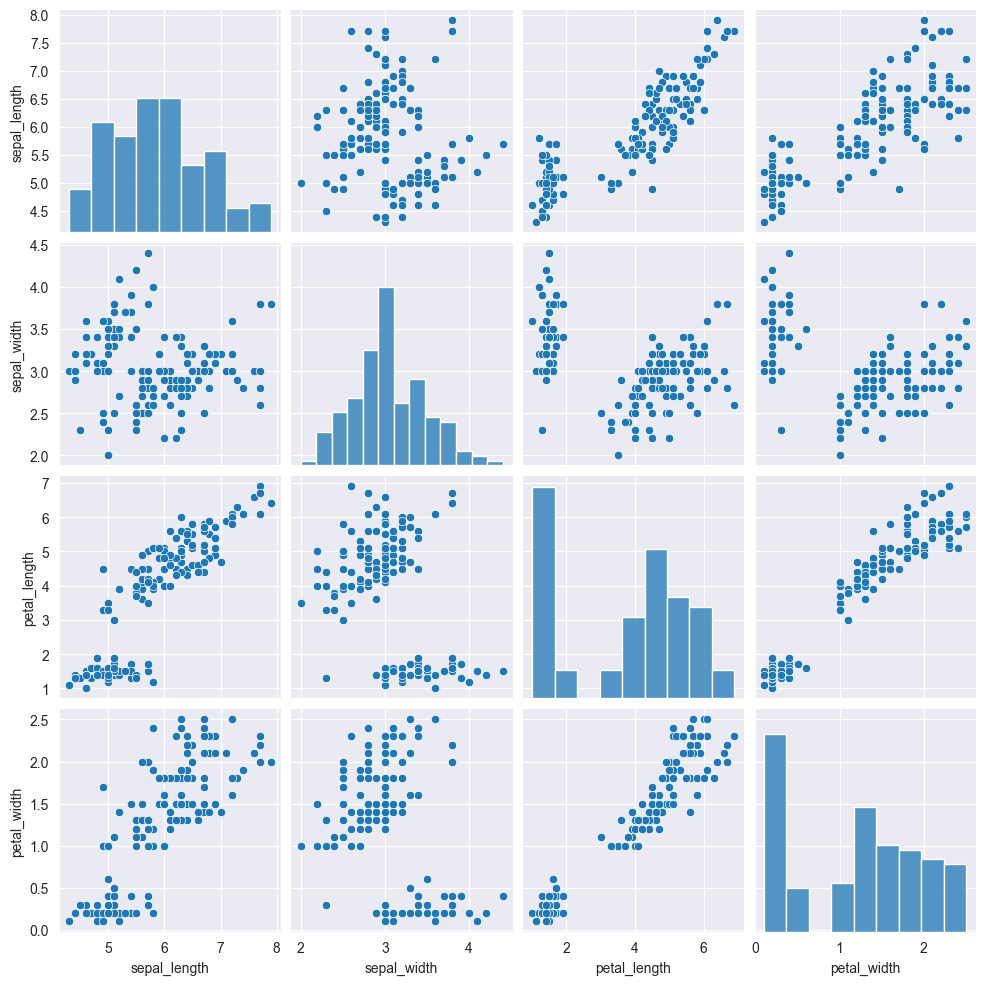

In [4]:
"""Esribe tu código aquí"""
sns.pairplot(iris)

<img src="iris.png" ALIGN="left">

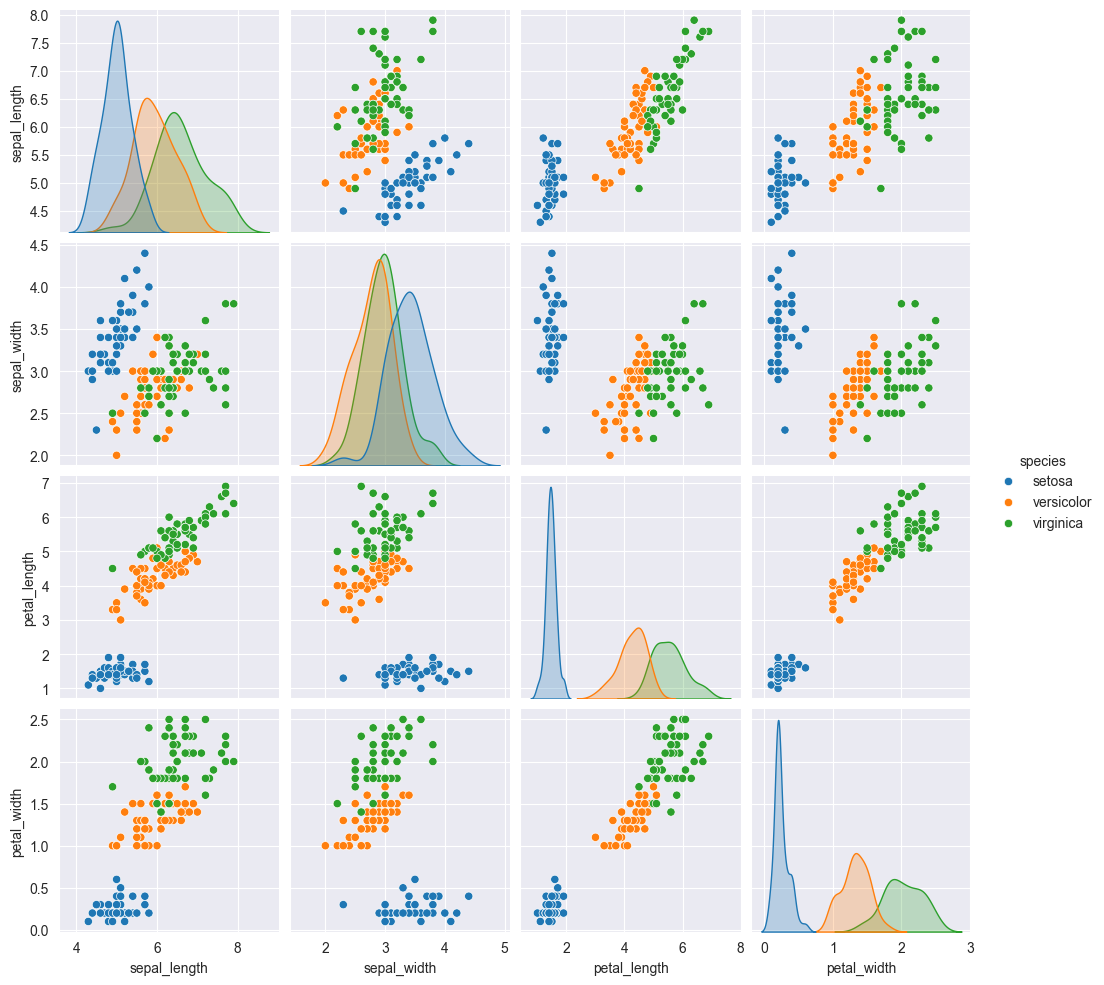

In [5]:
"""Esribe tu código aquí"""
sns.pairplot(iris,hue='species')

<img src="iris_especies.png" ALIGN="left">

<Axes: >

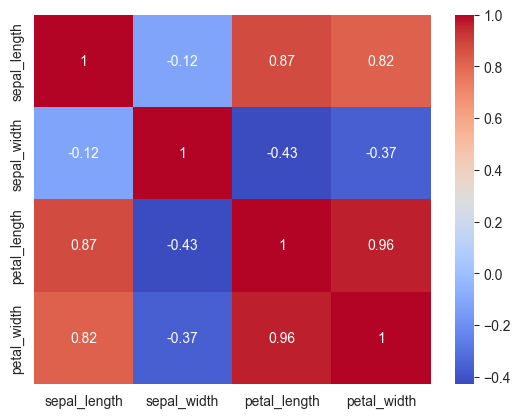

In [6]:
"""Esribe tu código aquí"""
columnas_numericas = iris.select_dtypes(include=['float64', 'int64'])
sns.heatmap(columnas_numericas.corr(), annot = True,cmap='coolwarm')

<img src="iris_corr.png" ALIGN="left">

Text(0.5, 1.0, 'Virginica')

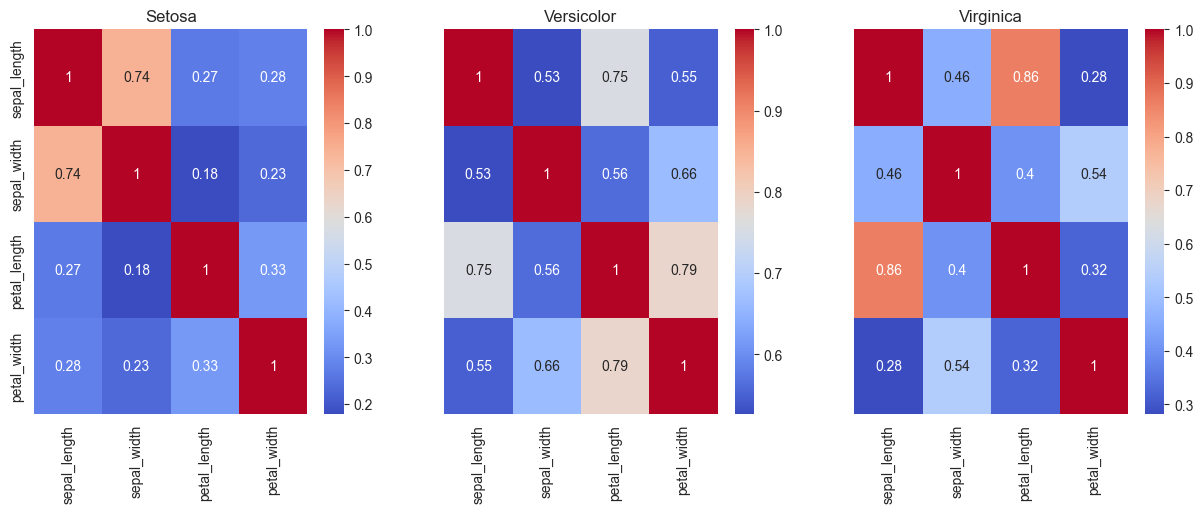

In [16]:
"""Esribe tu código aquí"""
import matplotlib.pyplot as plt
setosa_data = iris[iris['species'] == 'setosa'].drop(columns='species')
versicolor_data = iris[iris['species'] == 'versicolor'].drop(columns='species')
virginica_data = iris[iris['species'] == 'virginica'].drop(columns='species')
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.heatmap(setosa_data.corr(), annot=True, ax=axes[0], cmap='coolwarm' )
sns.heatmap(versicolor_data.corr(), annot=True, ax=axes[1], cmap='coolwarm')
sns.heatmap(virginica_data.corr(), annot=True, ax=axes[2], cmap='coolwarm')
axes[0].set_title('Setosa')
axes[1].set_title('Versicolor')
axes[2].set_title('Virginica')

<img src="iris_corr_especies.png" ALIGN="left">

<hr>
<b><font color='red'>Ejercicio 02</font></b>  

A partir de (../07_Matplotlib/medida_H18.npz y ../07_Matplotlib/medida_M18.npz) crea los siguientes grágicos que se muestran a continuación.

In [31]:
#primero cargamos los datos:

data = np.load('../08_Matplotlib/medida_H18.npz')
M_hombres=data['x']
data = np.load('../08_Matplotlib/medida_M18.npz')
M_mujeres=data['x']
print("se han cargado",len(M_hombres), "medidas de hombres",len(M_mujeres), "medidas de mujeres")
M_mujeres

se han cargado 4000 medidas de hombres 4000 medidas de mujeres


array([163.49141358, 153.85633621, 185.6741482 , ..., 167.87590432,
       162.45971387, 154.23333584])

In [36]:
df_hombres = pd.DataFrame(M_hombres, columns=['Hombres'])
df_mujeres = pd.DataFrame(M_mujeres, columns=['Mujeres'])

# Concatenar DataFrames
data_df = pd.concat([df_hombres,df_mujeres], axis=1)
data_df.head()

,Hombres,Mujeres
0,156.764854,163.491414
1,168.194586,153.856336
2,154.757202,185.674148
3,159.863775,150.341210
4,169.575784,161.927860


<img src="e3_0.png" ALIGN="left">

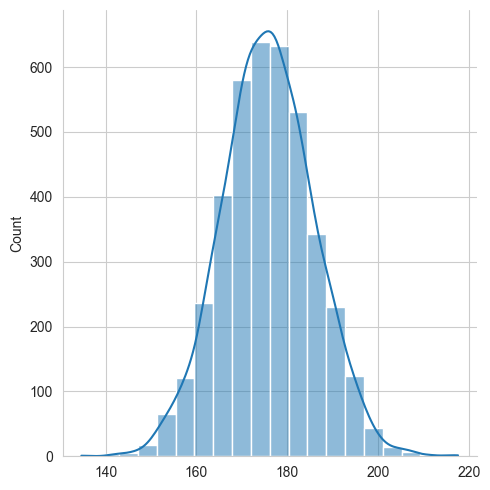

In [38]:
#Utiliza el style="whitegrid" para representar la siguiente gráfica
sns.set_style('whitegrid')
sns.displot(M_hombres, kde = True, bins=20)

<img src="e3_1.png" ALIGN="left">

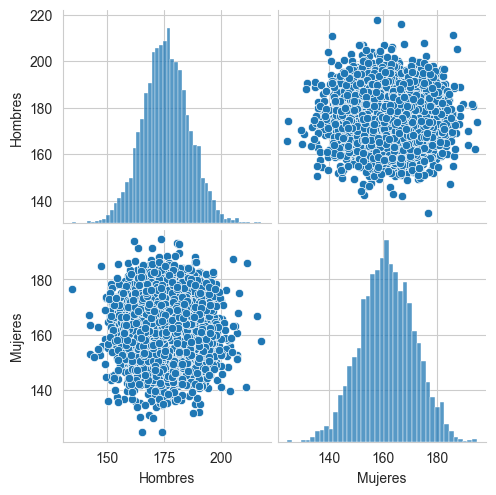

In [39]:
"""Esribe tu código aquí"""
sns.pairplot(data_df)

<img src="e3_2.png" ALIGN="left">

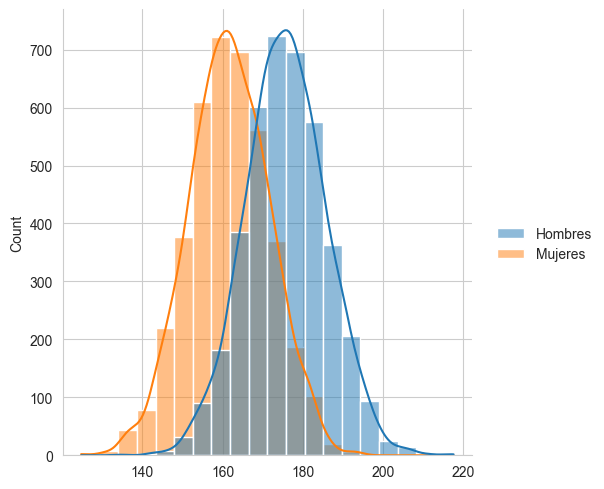

In [42]:
"""Esribe tu código aquí"""
sns.displot(data_df, kde = True, bins=20)

<img src="e3_3.png" ALIGN="left">

<Axes: >

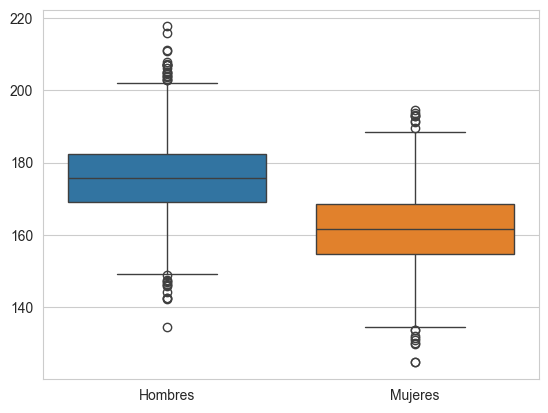

In [45]:
"""Esribe tu código aquí"""
sns.boxplot(data=data_df)

<img src="e3_4.png" ALIGN="left">

<Axes: >

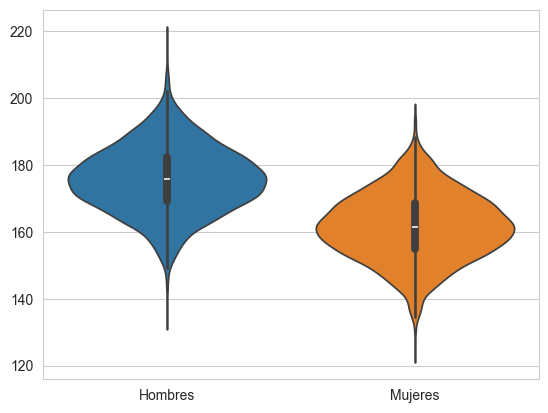

In [46]:
"""Esribe tu código aquí"""
sns.violinplot(data=data_df)

<img src="e3_5.png" ALIGN="left">

<Axes: >

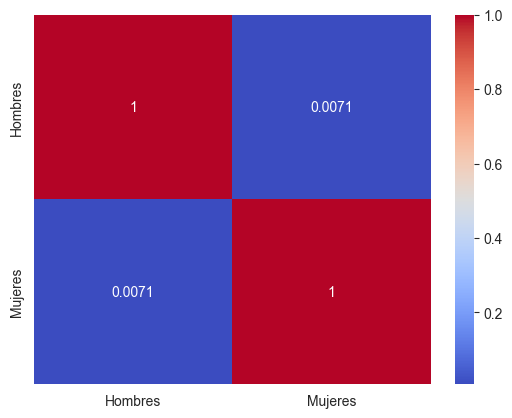

In [51]:
"""Esribe tu código aquí"""
sns.heatmap(data_df.corr(), annot = True, cmap = 'coolwarm')

<img src="e3_6.png" ALIGN="left">

<hr>
<b><font color='red'>Ejercicio 03</font></b>  

Analiza (../10_Pandas/super.cvs) con seaborn, almenos obten una gráfica con las correlaciones

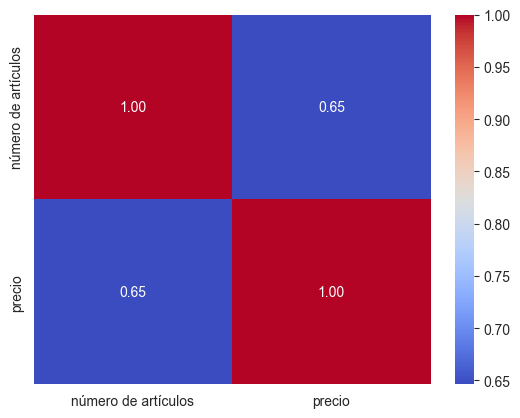

In [61]:
df = pd.read_csv('../10_Pandas/super.csv')
df_numeric = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

<hr>
<b><font color='red'>Ejercicio 04</font></b>  

Vamos a repetir la caída de calor vista en la teoría con los siguientes cambios:

<Axes: >

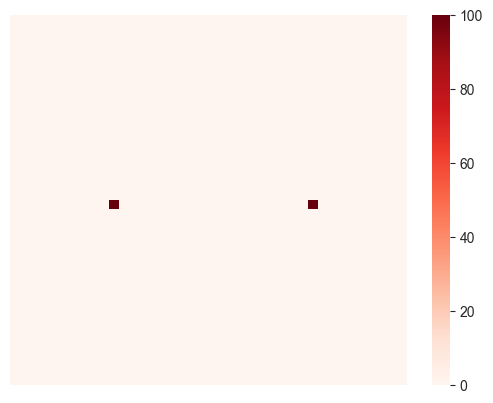

In [62]:
N=40
A = np.zeros([N,N])
#Ahora ponemos dos focos de calor en las dos esquinas
A[int(N/2),int(N/2+N/4)] =  100
A[int(N/2),int(N/2-N/4)] =  100
sns.heatmap(A, cmap = 'Reds', yticklabels=False, xticklabels=False)

Y utilizamos los 8 primeros vecinos, es decir:

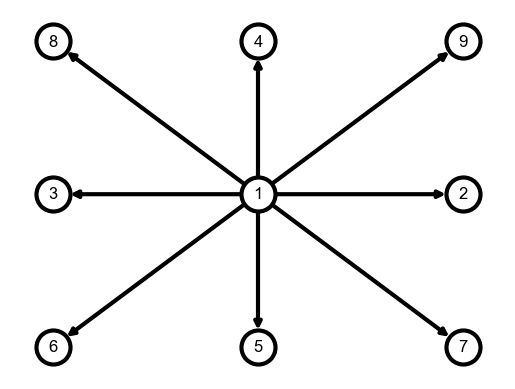

In [63]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph([(1, 2),(1, 2),(1, 3),(1, 4),(1, 5),(1, 6),(1, 7),(1, 8),(1, 9)])
L=1.0
pos = {1: (0, 0), 2: (L, 0), 3: (-L, 0), 4: (0,L), 5: (0,-L), 6: (-L,-L), 7: (L,-L), 8: (-L,L), 9: (L,L) }
options = {"font_size": 12,"node_size": 600,"node_color": "white","edgecolors": "black","linewidths": 3,"width": 3,}
nx.draw_networkx(G, pos, **options)
plt.axis("off")
plt.show()

<Axes: >

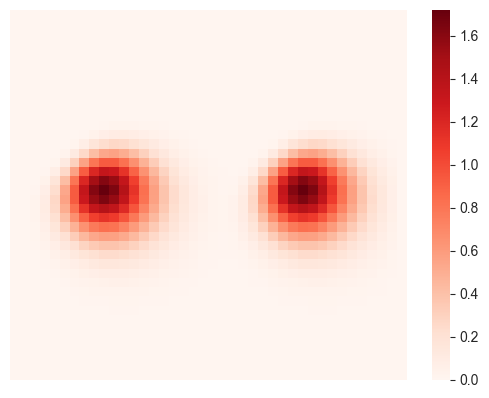

In [159]:
N = 40
A = np.zeros([N, N])

A[int(N / 2), int(N / 4)] = 100
A[int(N / 2), -int(N / 4)] = 100
for t in range(10):
    for i in range(1, len(A) - 1):
        for j in range(1, len(A) - 1):
            A[i][j]=(A[i+1][j]+A[i-1][j]+A[i][j+1]+A[i][j-1])/4
    current_heatmap = A.copy()
    heatmaps.append(current_heatmap)
    

sns.heatmap(A, cmap='Reds', yticklabels=False, xticklabels=False)

<img src="dos.png" ALIGN="left">

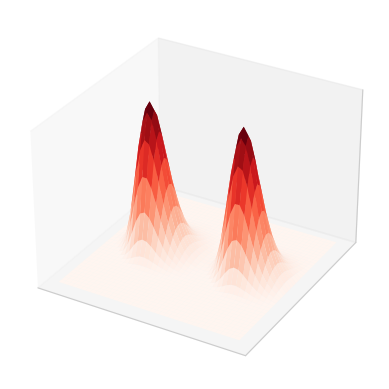

In [161]:
"""Esribe tu código aquí"""
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
X = np.arange(len(A))
Y = np.arange(len(A))
X, Y = np.meshgrid(X, Y)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
surf = ax.plot_surface(X, Y, A, cmap='Reds',linewidth=0)

<img src="dos_3d.png" ALIGN="left">